In [3]:
from scipy.stats import gaussian_kde, binned_statistic
from scipy.ndimage import gaussian_filter1d
import numpy as np
import pickle
import matplotlib.pyplot as plt

Checking if the code is woring properly

In [46]:
_file    = open("/home/svenpoder/repos/exoplanets-1/debug_results/like_TEST_CLEAN_N100_sigma0.1_f1.0gamma1.2rs20.0v1", "rb") 
like1     = pickle.load(_file)
_file    = open("/home/svenpoder/repos/exoplanets-1/debug_results/posterior_TEST_CLEAN_N100_sigma0.1_f1.0gamma1.2rs20.0v1", "rb") 
samples1  = pickle.load(_file)

Text(0.5, 1.0, 'Likelihood comparison')

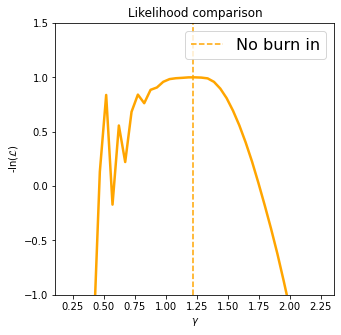

In [47]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))

axes.set_xlabel(r"$\gamma$")

bin_n=40
x = binned_statistic(samples1[:, 1], like1, 'max', bins=bin_n)[1] 
y = binned_statistic(samples1[:, 1], like1, 'max', bins=bin_n+1)[0]
y = y - np.max(y[~np.isnan(y)]) + 1
axes.plot(x, y, ls="-", color="orange", lw=2.5)
axes.axvline(samples1[:, 1][np.argmax(like1)], color="orange", ls="--", label="No burn in")


axes.set_ylim(-1, 1.5)
axes.legend(fontsize=16)

axes.set_ylabel(r"-ln($\mathcal{L}$)")

plt.title("Likelihood comparison")

In [9]:
def IMF_sampling(alpha, size, Mmin=14, Mmax=55):
    """
    Sampling from power-law distribution
    """
    y = np.random.uniform(0, 1, size=size)
    return ((Mmax**(alpha+1) - Mmin**(alpha+1))*y + Mmin**(alpha+1))**(1./(alpha+1))

In [46]:
from astropy.constants import L_sun, R_jup, M_jup, M_sun
N = 1000
_N = int(8.5*N)

# Mass
mass = IMF_sampling(-0.6, _N, Mmin=6, Mmax=75) # [Mjup]
mass = mass*M_jup.value/M_sun.value

In [58]:
relM = 0.1

# add Gaussian noise
mass_wn = mass + np.random.normal(loc=0, scale=(relM*mass), size=_N)

# select only those objects with masses between 14 and 55 Mjup and T > Tmin
pos  = np.where((mass_wn > 0.015) & (mass_wn < 0.051))  # 16 - 53 Mjup!


mass_wn, sigma_Mobs = mass_wn[pos][:N], relM*mass[pos][:N]


In [62]:
print(np.max(mass_wn*M_sun.value/M_jup.value))
print(np.min(mass_wn*M_sun.value/M_jup.value))

53.3480449067708
15.714476194777905


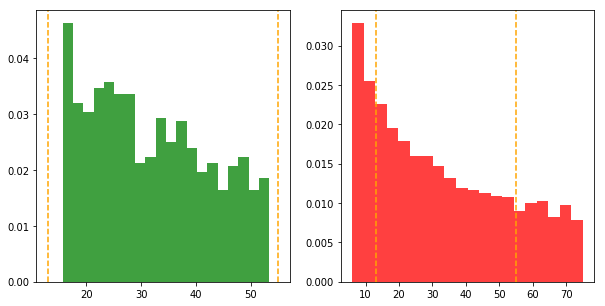

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.axvline(13, color="orange", ls="--", label="M_min")
ax1.axvline(55, color="orange", ls="--", label="M_max")

ax2.axvline(13, color="orange", ls="--", label="M_min")
ax2.axvline(55, color="orange", ls="--", label="M_max")

plt.axes(ax1)
n, bins, patches = plt.hist(mass_wn*M_sun.value/M_jup.value, 20, density=True, facecolor='g', alpha=0.75)


plt.axes(ax2)
n, bins, patches = plt.hist(mass*M_sun.value/M_jup.value, 20, density=True, facecolor='r', alpha=0.75)

In [71]:
relA = 0.1
ages = np.random.uniform(1., 10., _N) # [yr] / [1-10 Gyr]
ages_wn = ages + np.random.normal(loc=0, scale=(relA*ages), size=_N)
pos_a  = ((ages_wn > 1.002) & (ages_wn < 9.998))

ages_wn, Aobs_sigma = ages_wn[pos][:N], relA*ages[pos][:N]

C:\Users\SvenP\Anaconda3\lib\site-packages\matplotlib\pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


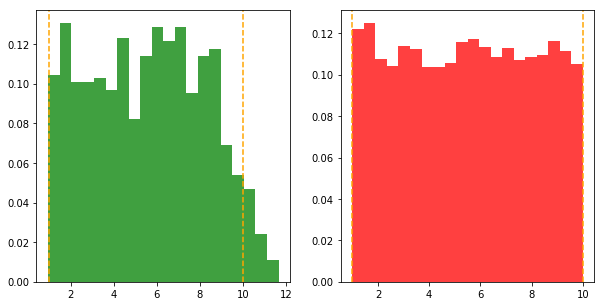

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.axvline( 1.002, color="orange", ls="--", label="M_min")
ax1.axvline(9.998, color="orange", ls="--", label="M_max")

ax2.axvline( 1.002, color="orange", ls="--", label="M_min")
ax2.axvline(9.998, color="orange", ls="--", label="M_max")

plt.axes(ax1)
n, bins, patches = plt.hist(ages_wn, 20, density=True, facecolor='g', alpha=0.75)


plt.axes(ax2)
n, bins, patches = plt.hist(ages, 20, density=True, facecolor='r', alpha=0.75)

In [16]:
_file    = open("/home/svenpoder/repos/exoplanets-1/debug_results/like_Tcut_N100_sigma0.1_f1.0gamma1.2rs20.0v1", "rb") 
like1     = pickle.load(_file)
_file    = open("/home/svenpoder/repos/exoplanets-1/debug_results/posterior_Tcut_N100_sigma0.1_f1.0gamma1.2rs20.0v1", "rb") 
samples1  = pickle.load(_file)



FileNotFoundError: [Errno 2] No such file or directory: '/home/svenpoder/repos/exoplanets-1/debug_results/posterior_nocut_N100_sigma0.1_f1.0gamma1.2rs20.0v1'

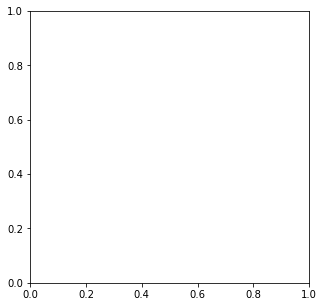

In [3]:
from scipy.stats import gaussian_kde
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
_file    = open("/home/svenpoder/repos/exoplanets-1/debug_results/posterior_nocut_N100_sigma0.1_f1.0gamma1.2rs20.0v1", "rb") 

axes.set_xlabel(r"$\gamma$")
axes.set_ylabel(r"Posterior")

bin_n=80
axes.axvline(1.2, color="orange", ls="--", label="No burn in")

samples  = pickle.load(_file)
kde      = gaussian_kde(samples[:, 1])
xvals = binned_statistic(samples[:, 1], like1, 'mean', bins=bin_n)[1] 
axes.plot(xvals, kde(xvals)/np.max(kde(xvals)), color="red", lw=2.)
plt.show()

---

Curves no. 1


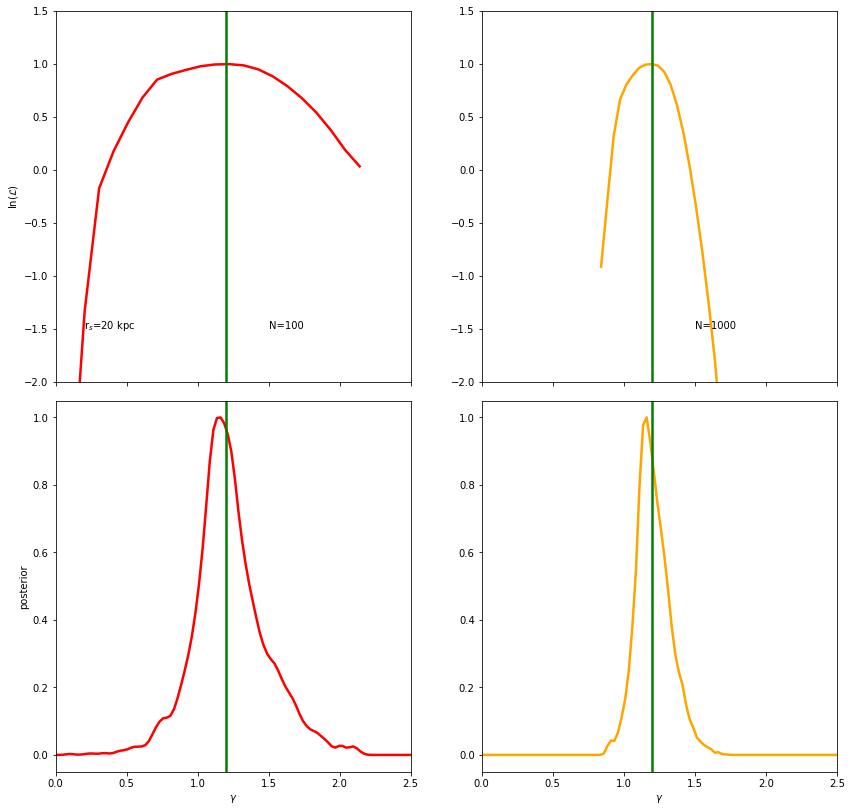

In [4]:
nBDs1 = 100; nBDs2 = 1000
sigma = 0.2
f     = 1.; gamma = 1.2; rs = 20.

ex = "like_post_data_100"
ex2 = "like_post_data_1000"

fig, axes = plt.subplots(2, 2, figsize=(14, 14), sharex=True)
axes[0, 0].set_ylim(-2, 1.5); axes[0, 1].set_ylim(-2, 1.5)
axes[0, 0].set_xlim(0., 2.5); axes[0, 1].set_xlim(0., 2.5)

xvals = axes[0, 0].get_xlim()
xvals = np.linspace(xvals[0], xvals[1], 100)
     
    
axes[1, 0].set_xlabel(r"$\gamma$"); axes[1, 1].set_xlabel(r"$\gamma$")

smooth=0.8

ls = [ "-", ":", "-.", "--", (0, (1, 10)), (0, (1, 1)), (0, (3, 10, 1, 10))]
j  = 0

like_post_path =  "/home/sven/repos/exoplanets-1/like_post_data/like_post_data_100/"
like_post_path2 =  "/home/sven/repos/exoplanets-1/like_post_data/like_post_data_1000/"

for i in range(1):
    
    rank = i + 1
    print("Curves no. {}".format(rank))
    
    # Load file
    _file    = open(like_post_path + ("like_"+ex+"_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i"%(nBDs1, sigma, gamma, rs, rank)), "rb") 
    like     = pickle.load(_file)
    _file    = open(like_post_path + ("posterior_"+ex+"_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i"%(nBDs1, sigma, gamma, rs, rank)), "rb") 
    samples  = pickle.load(_file)

    # Likelihood 1 
    bin_n=20
    x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
    y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
    y = y - np.max(y[~np.isnan(y)]) + 1
    axes[0, 0].plot(x, gaussian_filter1d(y, sigma=smooth), color="r", lw=2.5)#, ls=ls[j])

    # Posterior 1
    kde   = gaussian_kde(samples[:, 1])
    axes[1, 0].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="r", lw=2.5)#, ls=ls[j]) 

    # Load file
    _file    = open(like_post_path2 + ("like_"+ex2+"_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i"%(nBDs2, sigma, gamma, rs, rank)), "rb") 
    like     = pickle.load(_file)
    _file    = open(like_post_path2 + ("posterior_"+ex2+"_N%i_sigma%.1f_f1.0gamma%.1frs%.1fv%i"%(nBDs2, sigma, gamma, rs, rank)), "rb")  
    samples  = pickle.load(_file)
    
    # Likelihood 2
    bin_n=20
    x = binned_statistic(samples[:, 1], like, 'max', bins=bin_n)[1] 
    y = binned_statistic(samples[:, 1], like, 'max', bins=bin_n+1)[0]
    y = y - np.max(y[~np.isnan(y)]) + 1
    axes[0, 1].plot(x, gaussian_filter1d(y, sigma=smooth), color="orange", lw=2.5)#, ls=ls[j])
    
    # Posterior 2
    kde   = gaussian_kde(samples[:, 1])
    axes[1, 1].plot(xvals, kde(xvals)/np.max(kde(xvals)), color="orange", lw=2.5)#, ls=ls[j]) 
    
    j+=1

axes[0, 0].set_ylabel(r"ln($\mathcal{L}$)"); axes[1, 0].set_ylabel("posterior")
axes[0, 0].text(1.5, -1.5, "N=100"); axes[0, 1].text(1.5, -1.5, "N=1000")
axes[0, 0].text(0.2, -1.5, "r$_s$=20 kpc")

axes[0, 0].axvline(gamma, color="green", lw=2.5); axes[0, 1].axvline(gamma, color="green", lw=2.5)
axes[1, 0].axvline(gamma, color="green", lw=2.5); axes[1, 1].axvline(gamma, color="green", lw=2.5)
fig.subplots_adjust(hspace=0.05)


#fig.savefig("like_post_analytic_"+ex+"_sigma0.2_gamma1.2_rs20.pdf", bbox_inches="tight")